In [3]:
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn import *
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Load data from Data repository 

In [4]:
df = pd.read_csv("../Data/Combined_Cycle_Power_Plant.csv")
df.head()

AT      V       AP     RH      EP
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

<b>Building the Linear Regression Model<b/>

In [5]:
target = "EP"
y = np.log(df[target]) #outcome variable
X = df.copy() #feature matrix
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                        test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


print("training r2:", metrics.r2_score(y_train, y_train_pred),
      "\ntesting r2:", metrics.r2_score(y_test, y_test_pred),
      "\ntraining mse:", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntesting mse:", metrics.mean_squared_error(y_test, y_test_pred))

training r2: 0.92989286475448 
testing r2: 0.9294444312957376 
training mse: 9.787557016553571e-05 
testing mse: 9.882808699958441e-05


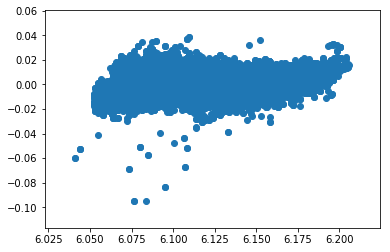

In [6]:
plt.scatter(y_test, y_test-y_test_pred)

In [7]:
import seaborn as sns

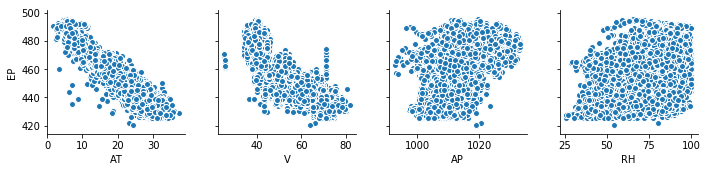

In [8]:
sns.pairplot(df, x_vars=X.columns, y_vars = ["EP"])

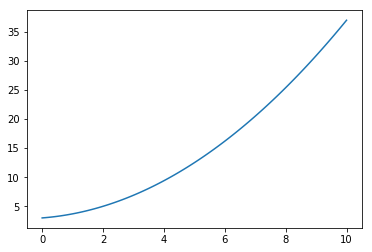

In [9]:
x = np.linspace(0, 10, 100)
y = 3 + 0.4 * x + 0.3 * (x **2)
plt.plot(x, y)

## -------------------------------------------------END------------------------------------------------